## ENSO in Miocene simulations

(Oldeman et al. 2021) & (Pontes et al. 2022) explored ENSO in Pliocene by using dataset from PlioMIP2. They found robust weakening of ENSO variability among PlioMIP2 ensembles.

The assignment investigates the ENSO in Miocene simulations. Although the purpose of the experiments is studying the importance of modifying aerosols and dust emission in Miocene simulations, the ENSO amplitude could be affected by the modification of aerosols and dust emission. 

#### 1. EOF Analysis: pick the PC1 of SST in the tropical Pacific
#### 2. ENSO indices: Nino3 / Nino3.4 / Nino4
#### 3. Correlation between PC1 and ENSO indices: deciding the representative ENSO index in the experiments
#### 4. Composite Precipitation based on ENSO indices

======================================================================================================

In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Dataset
### Simulation
1. Mio_Pi: Miocene simulation with Pre-industrial aerosols
    * Time: 2060 years (clim.: 1900~1999)
2. Mio_Mio: Miocene simulation with Miocene aerosols (Modified Pre-industrial aerosols)
    * Time: 360 years (clim.: 201~300)

In [3]:
# --- read data --- 

path = '/scratch/pchen25/clim680_dataset/MidMiocene/'
file_Pi = 'Mio_Pi/B.MMIOx2_C5_280_WISOon.cam.clim_1900_1999.nc'
file_Mio = 'Mio_Mio/B.MMIOx2_C5_280_WISOon_aeroZonal.cam.clim_100_300.nc'

ds_Pi = xr.open_mfdataset(path+file_Pi)
ds_Mio = xr.open_mfdataset(path+file_Mio)

ds_Pi

<xarray.Dataset>
Dimensions:    (time: 1200, lat: 96, lon: 144, nbnd: 2)
Coordinates:
  * lat        (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon        (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time       (time) object 1900-02-01 00:00:00 ... 2000-01-01 00:00:00
Dimensions without coordinates: nbnd
Data variables:
    PRECC      (time, lat, lon) float32 dask.array<chunksize=(1200, 96, 144), meta=np.ndarray>
    PRECL      (time, lat, lon) float32 dask.array<chunksize=(1200, 96, 144), meta=np.ndarray>
    TS         (time, lat, lon) float32 dask.array<chunksize=(1200, 96, 144), meta=np.ndarray>
    time_bnds  (time, nbnd) object dask.array<chunksize=(1200, 2), meta=np.ndarray>
Attributes:
    Conventions:      CF-1.0
    source:           CAM
    case:             B.MMIOx2_C5_280_WISOon
    title:            UNSET
    logname:          pacosta
    host:             r8i0n31
    Version:          $Name$
    revision_Id:      $Id$
    initial_file:     /glade/scratch/pacosta/B.MMIOx2_C5_280_WISOon/run/B.MMI...
    topography_file:  /glade/work/pacosta/PaleoBC/heroldn/gx1vMIO/cami_bnd_to...
    history:          Thu Nov  2 18:37:20 2023: ncrcat ./B.MMIOx2_C5_280_WISO...
    NCO:              netCDF Operators version 5.1.4 (Homepage = http://nco.s...

In [4]:
# (LANDFRAC)

path = '/scratch/pchen25/clim680_dataset/MidMiocene/atm/'
file_name = 'B.MMIOx2_C5_280_WISOon_ANN_concat.nc'
ds = xr.open_dataset(path+file_name)

var = 'LANDFRAC'
mask = ds[var][0,:,:]
data = ds['TS']

data, lons = add_cyclic_point(data, coord=ds['lon'])
mask, mask_lons = add_cyclic_point(mask, coord=ds['lon'])

In [6]:
# --- (var.): TS ---

var = 'TS'
ts_Pi = ds_Pi[var]
ts_Mio = ds_Mio[var][1200:2400,:,:]

# --- Anomaly ---
ts_Pi_gb = ts_Pi.groupby('time.month')
ts_Mio_gb = ts_Mio.groupby('time.month')
ts_Pi_anom = ts_Pi_gb - ts_Pi_gb.mean(dim='time')
ts_Mio_anom = ts_Mio_gb - ts_Mio_gb.mean(dim='time')

/home/pchen25/.conda/envs/clim_data/lib/python3.10/site-packages/xarray/core/indexing.py:1446: PerformanceWarning: Slicing with an out-of-order index is generating 100 times more chunks
  return self.array[key]
/home/pchen25/.conda/envs/clim_data/lib/python3.10/site-packages/xarray/core/indexing.py:1446: PerformanceWarning: Slicing with an out-of-order index is generating 100 times more chunks
  return self.array[key]


---
## Decide ENSO indices
(Oldeman et al. 2021): correlate the PC1 with ENSO indices to check which region is representative for ENSO variability. The first empirical orthogonal function (EOF) is determined in the tropical Pacific.

Domain: (23°S-23°N, 140°E-80°W)

#### Reference:
Oldeman, A. M., Baatsen, M. L., von Der Heydt, A. S., Dijkstra, H. A., Tindall, J. C., Abe-Ouchi, A., ... & Williams, C. J. (2021). Reduced El Niño variability in the mid-Pliocene according to the PlioMIP2 ensemble. Climate of the Past Discussions, 2021, 1-35.

### 1. EOF Analysis
#### (1) select domain (23°S-23°N, 140°E-80°W)

In [7]:
ts_Pi_TroPac = ts_Pi_anom.sel(lat=slice(-23,23),lon=slice(140,280))
ts_Mio_TroPac = ts_Mio_anom.sel(lat=slice(-23,23),lon=slice(140,280))

# --- Mio_Pi: DJF
shape1 = (100, 12, 24, 57)
TroPac_Pi_yr1 = np.random.randn(*shape1)

for yy in range(100):
    TroPac_Pi_yr1[yy,:,:,:] = ts_Pi_TroPac[yy*12:yy*12+12,:,:]

shape2 = (99, 24, 57)
TroPac_Pi_djf = np.random.randn(*shape2)

for tt in range(99):
    TroPac_Pi_djf[tt,:,:] = (TroPac_Pi_yr1[tt,11,:,:] + TroPac_Pi_yr1[tt+1,0,:,:] + TroPac_Pi_yr1[tt+1,1,:,:])/3

# --- Mio_Mio: DJF
TroPac_Mio_yr1 = np.random.randn(*shape1)

for yy in range(100):
    TroPac_Mio_yr1[yy,:,:,:] = ts_Mio_TroPac[yy*12:yy*12+12,:,:]

TroPac_Mio_djf = np.random.randn(*shape2)

for tt in range(99):
    TroPac_Mio_djf[tt,:,:] = (TroPac_Mio_yr1[tt,11,:,:] + TroPac_Mio_yr1[tt+1,0,:,:] + TroPac_Mio_yr1[tt+1,1,:,:])/3


In [8]:
# Weighting of the data --- for area mean

coslat = np.cos(np.deg2rad(ts_Pi_TroPac.coords['lat'].values))
wgts = np.sqrt(coslat)[..., np.newaxis]
ts_Pi_wgt = TroPac_Pi_djf*wgts
ts_Mio_wgt = TroPac_Mio_djf*wgts

In [9]:
# Reshape from [lat,lon,time] to [time,space]

nx = len(ts_Pi_TroPac['lon'])
ny = len(ts_Pi_TroPac['lat'])
nt = 99

ts_Pi_X = np.reshape(ts_Pi_wgt, ((nt,ny*nx)))
ts_Mio_X = np.reshape(ts_Mio_wgt, ((nt,ny*nx)))

#### (2) Calculation of EOFs

In [10]:
# Calculate the Covariance Matrix

ts_Pi_C = np.cov(ts_Pi_X)
ts_Mio_C = np.cov(ts_Mio_X)

# Calculate the eigenvalues and vectors of the Covariance Matrix
from numpy import linalg as LA

eigenvalues_Pi, eigenvectors_Pi = LA.eig(ts_Pi_C)
eigenvalues_Mio, eigenvectors_Mio = LA.eig(ts_Mio_C)

# Sorts the indices of the matrix based on the magnitudes of the eigenvalues
idx_Pi = eigenvalues_Pi.argsort()[::-1]  
eigenvalues_Pi = eigenvalues_Pi[idx_Pi]
eigenvectors_Pi = eigenvectors_Pi[:,idx_Pi]

idx_Mio = eigenvalues_Mio.argsort()[::-1]  
eigenvalues_Mio = eigenvalues_Mio[idx_Mio]
eigenvectors_Mio = eigenvectors_Mio[:,idx_Mio]

In [11]:
PC_Pi = eigenvectors_Pi
PC_Mio = eigenvectors_Mio

EOF_Pi = np.dot(ts_Pi_X.T, PC_Pi)
EOF_Pi = EOF_Pi.reshape((ny,nx,nt)).T/wgts.squeeze()

EOF_Mio = np.dot(ts_Mio_X.T, PC_Mio)
EOF_Mio = EOF_Mio.reshape((ny,nx,nt)).T/wgts.squeeze()

#### (3) Plot the first three EOFs

/tmp/ipykernel_27830/3632930953.py:7: UserWarning: The following kwargs were not used by contour: 'crs'
  panel = ax1[i].contourf(ts_Pi_TroPac['lon'], ts_Pi_TroPac['lat'], EOF_Pi[i,:,:].T, clevs,


''

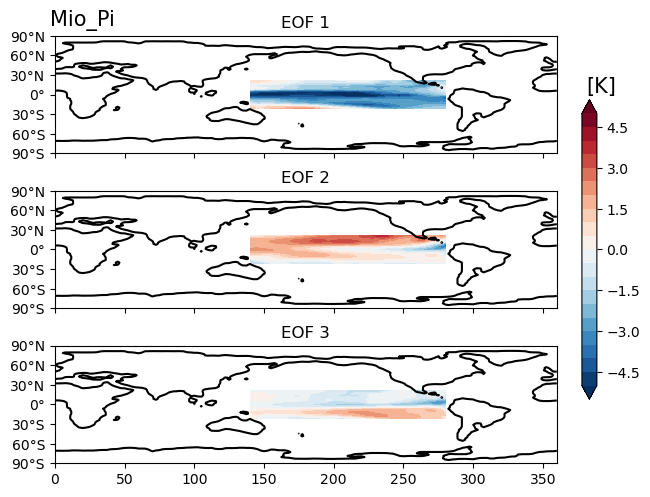

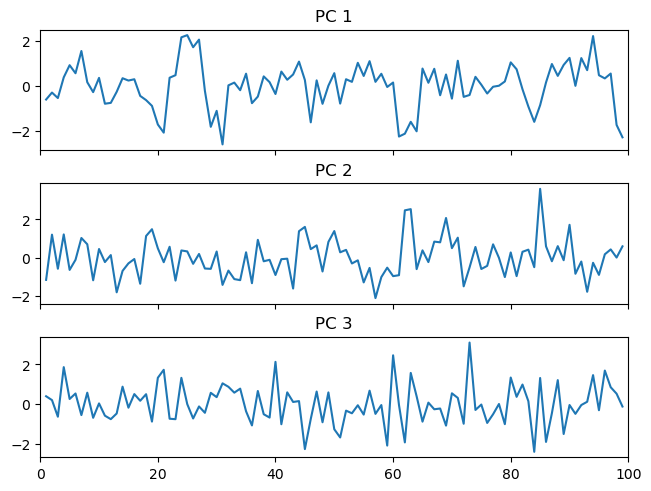

In [12]:
# Plot the first three EOFs (the ones with the most variance) - Mio_Pi

clevs = np.linspace(-5, 5, 21)

fig, ax1 = plt.subplots(nrows=3, ncols=1, layout="constrained", sharex='col')
for i in np.arange(3):
    panel = ax1[i].contourf(ts_Pi_TroPac['lon'], ts_Pi_TroPac['lat'], EOF_Pi[i,:,:].T, clevs, 
                            crs=ccrs.PlateCarree(),
                            cmap='RdBu_r', extend='both')
    ax1[i].set_title(f"EOF {i+1}")

    # Latitude labels
    ax1[i].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
    lat_formatter = cticker.LatitudeFormatter()
    ax1[i].yaxis.set_major_formatter(lat_formatter)
    
    ax1[i].contour(lons, ds['lat'], mask, [0.5,1.5],
                  colors='k', linewidths=1.5, zorder=3)
    
plt.figtext(0.93,0.83,'[K]',ha='center',fontsize=15)
plt.figtext(0.12,0.97,'Mio_Pi',ha='center',fontsize=15)
fig.colorbar(panel, ax=ax1, shrink=0.7) 


fig, ax1_time = plt.subplots(nrows=3, ncols=1, layout="constrained", sharex='col')
for i in np.arange(3):
    pcnorm = PC_Pi[:,i]/np.std(PC_Pi[:,i])
    panel = ax1_time[i].plot(np.arange(1,100),pcnorm)
    ax1_time[i].set_title(f"PC {i+1}")
    plt.xlim(0, 100)
;

/tmp/ipykernel_27830/4047304113.py:7: UserWarning: The following kwargs were not used by contour: 'crs'
  panel = ax1[i].contourf(ts_Mio_TroPac['lon'], ts_Mio_TroPac['lat'], EOF_Mio[i,:,:].T, clevs,


''

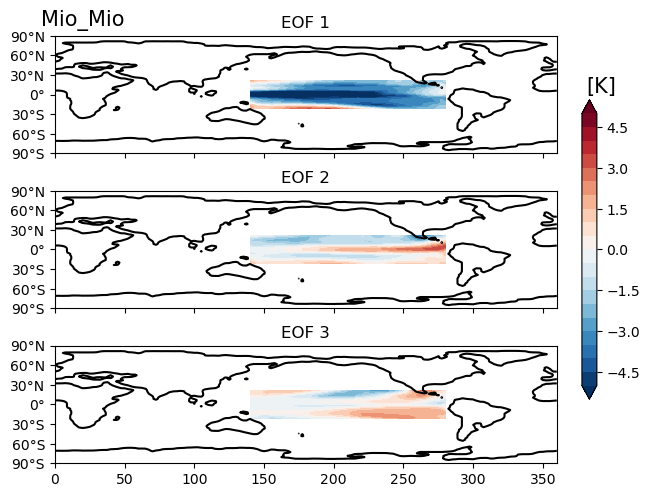

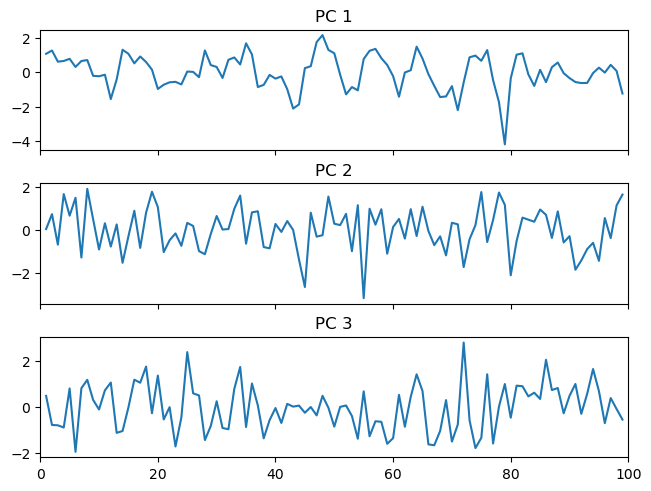

In [13]:
# Plot the first three EOFs (the ones with the most variance) - Mio_Mio

clevs = np.linspace(-5, 5, 21)

fig, ax1 = plt.subplots(nrows=3, ncols=1, layout="constrained", sharex='col')
for i in np.arange(3):
    panel = ax1[i].contourf(ts_Mio_TroPac['lon'], ts_Mio_TroPac['lat'], EOF_Mio[i,:,:].T, clevs, 
                            crs=ccrs.PlateCarree(),
                            cmap='RdBu_r', extend='both')
    ax1[i].set_title(f"EOF {i+1}")

    # Latitude labels
    ax1[i].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
    lat_formatter = cticker.LatitudeFormatter()
    ax1[i].yaxis.set_major_formatter(lat_formatter)
    
    ax1[i].contour(lons, ds['lat'], mask, [0.5,1.5],
                  colors='k', linewidths=1.5, zorder=3)
    
plt.figtext(0.93,0.83,'[K]',ha='center',fontsize=15)
plt.figtext(0.12,0.97,'Mio_Mio',ha='center',fontsize=15)
fig.colorbar(panel, ax=ax1, shrink=0.7) 


fig, ax1_time = plt.subplots(nrows=3, ncols=1, layout="constrained", sharex='col')
for i in np.arange(3):
    pcnorm = PC_Mio[:,i]/np.std(PC_Mio[:,i])
    panel = ax1_time[i].plot(np.arange(1,100),pcnorm)
    ax1_time[i].set_title(f"PC {i+1}")
    plt.xlim(0, 100)
;

---
## 2. ENSO index

#### (1) Nino3.4
Domain: (5°S-5°N, 170°W-120°W)

In [14]:
lon_min = 190
lon_max = 240

ts_Nino34_Pi = ts_Pi_anom.sel(lat=slice(-5, 5), lon=slice(lon_min, lon_max))
ts_Nino34_Mio = ts_Mio_anom.sel(lat=slice(-5, 5), lon=slice(lon_min, lon_max))

In [15]:
# --- Mio_Pi: DJF
weights = np.cos(np.deg2rad(ts_Nino34_Pi.lat))
Nino34_Pi = ts_Nino34_Pi.weighted(weights).mean(dim=['lon','lat'])

shape1 = (100, 12)
Nino34_Pi_yr1 = np.random.randn(*shape1)

for yy in range(100):
    Nino34_Pi_yr1[yy,:] = Nino34_Pi[yy*12:yy*12+12]

shape2 = (1, 99)
Nino34_Pi_djf = np.random.randn(*shape2)

for tt in range(99):
    Nino34_Pi_djf[0, tt] = (Nino34_Pi_yr1[tt,11] + Nino34_Pi_yr1[tt+1,0] + Nino34_Pi_yr1[tt+1,1])/3

In [30]:
# --- Mio_Mio: DJF
weights = np.cos(np.deg2rad(ts_Nino34_Mio.lat))
Nino34_Mio = ts_Nino34_Mio.weighted(weights).mean(dim=['lon','lat'])

shape1 = (100, 12)
Nino34_Mio_yr1 = np.random.randn(*shape1)

for yy in range(100):
    Nino34_Mio_yr1[yy,:] = Nino34_Mio[yy*12:yy*12+12]

shape2 = (1, 99)
Nino34_Mio_djf = np.random.randn(*shape2)

for tt in range(99):
    Nino34_Mio_djf[0, tt] = (Nino34_Mio_yr1[tt,11] + Nino34_Mio_yr1[tt+1,0] + Nino34_Mio_yr1[tt+1,1])/3

#### (2) Nino4
Domain: (5°S-5°N, 160°E-150°W)

In [17]:
lon_min = 160
lon_max = 210

ts_Nino4_Pi = ts_Pi_anom.sel(lat=slice(-5, 5), lon=slice(lon_min, lon_max))
ts_Nino4_Mio = ts_Mio_anom.sel(lat=slice(-5, 5), lon=slice(lon_min, lon_max))

In [18]:
# --- Mio_Pi: DJF
weights = np.cos(np.deg2rad(ts_Nino4_Pi.lat))
Nino4_Pi = ts_Nino4_Pi.weighted(weights).mean(dim=['lon','lat'])

shape1 = (100, 12)
Nino4_Pi_yr1 = np.random.randn(*shape1)

for yy in range(100):
    Nino4_Pi_yr1[yy,:] = Nino4_Pi[yy*12:yy*12+12]

shape2 = (1, 99)
Nino4_Pi_djf = np.random.randn(*shape2)

for tt in range(99):
    Nino4_Pi_djf[0, tt] = (Nino4_Pi_yr1[tt,11] + Nino4_Pi_yr1[tt+1,0] + Nino4_Pi_yr1[tt+1,1])/3

In [34]:
# --- Mio_Mio: DJF
weights = np.cos(np.deg2rad(ts_Nino4_Mio.lat))
Nino4_Mio = ts_Nino4_Mio.weighted(weights).mean(dim=['lon','lat'])

shape1 = (100, 12)
Nino4_Mio_yr1 = np.random.randn(*shape1)

for yy in range(100):
    Nino4_Mio_yr1[yy,:] = Nino4_Mio[yy*12:yy*12+12]

shape2 = (1, 99)
Nino4_Mio_djf = np.random.randn(*shape2)

for tt in range(99):
    Nino4_Mio_djf[0, tt] = (Nino4_Mio_yr1[tt,11] + Nino4_Mio_yr1[tt+1,0] + Nino4_Mio_yr1[tt+1,1])/3

#### (3) Nino3
Domain: (5°S-5°N, 150°W-90°W)

In [20]:
lon_min = 210
lon_max = 270

ts_Nino3_Pi = ts_Pi_anom.sel(lat=slice(-5, 5), lon=slice(lon_min, lon_max))
ts_Nino3_Mio = ts_Mio_anom.sel(lat=slice(-5, 5), lon=slice(lon_min, lon_max))

In [21]:
# --- Mio_Pi: DJF
weights = np.cos(np.deg2rad(ts_Nino3_Pi.lat))
Nino3_Pi = ts_Nino3_Pi.weighted(weights).mean(dim=['lon','lat'])

shape1 = (100, 12)
Nino3_Pi_yr1 = np.random.randn(*shape1)

for yy in range(100):
    Nino3_Pi_yr1[yy,:] = Nino3_Pi[yy*12:yy*12+12]

shape2 = (1, 99)
Nino3_Pi_djf = np.random.randn(*shape2)

for tt in range(99):
    Nino3_Pi_djf[0, tt] = (Nino3_Pi_yr1[tt,11] + Nino3_Pi_yr1[tt+1,0] + Nino3_Pi_yr1[tt+1,1])/3

In [22]:
# --- Mio_Mio: DJF
weights = np.cos(np.deg2rad(ts_Nino3_Mio.lat))
Nino3_Mio = ts_Nino3_Mio.weighted(weights).mean(dim=['lon','lat'])

shape1 = (100, 12)
Nino3_Mio_yr1 = np.random.randn(*shape1)

for yy in range(100):
    Nino3_Mio_yr1[yy,:] = Nino3_Mio[yy*12:yy*12+12]

shape2 = (1, 99)
Nino3_Mio_djf = np.random.randn(*shape2)

for tt in range(99):
    Nino3_Mio_djf[0, tt] = (Nino3_Mio_yr1[tt,11] + Nino3_Mio_yr1[tt+1,0] + Nino3_Mio_yr1[tt+1,1])/3

---
## 3. Correlation: PC vs ENSO indices
#### (1) Correlation: Mio_Pi

In [23]:
# --- PC1 ---

R_Nino4_Pi = np.corrcoef(Nino4_Pi_djf, PC_Pi[:,0]/np.std(PC_Pi[:,0]))
R_Nino34_Pi = np.corrcoef(Nino34_Pi_djf, PC_Pi[:,0]/np.std(PC_Pi[:,0]))
R_Nino3_Pi = np.corrcoef(Nino3_Pi_djf, PC_Pi[:,0]/np.std(PC_Pi[:,0]))

corr_Nino4_Pi = R_Nino4_Pi[0,1]
corr_Nino34_Pi = R_Nino34_Pi[0,1]
corr_Nino3_Pi = R_Nino3_Pi[0,1]

print('Mio_Pi:')
print('-------------')
print('Correlation (Nino4 & PC1): ', corr_Nino4_Pi)
print('Correlation (Nino34 & PC1): ', corr_Nino34_Pi)
print('Correlation (Nino3 & PC1): ', corr_Nino3_Pi)

# --- PC2 ---

R_Nino4_Pi = np.corrcoef(Nino4_Pi_djf, PC_Pi[:,1]/np.std(PC_Pi[:,1]))
R_Nino34_Pi = np.corrcoef(Nino34_Pi_djf, PC_Pi[:,1]/np.std(PC_Pi[:,1]))
R_Nino3_Pi = np.corrcoef(Nino3_Pi_djf, PC_Pi[:,1]/np.std(PC_Pi[:,1]))

corr_Nino4_Pi = R_Nino4_Pi[0,1]
corr_Nino34_Pi = R_Nino34_Pi[0,1]
corr_Nino3_Pi = R_Nino3_Pi[0,1]

print('Correlation (Nino4 & PC2): ', corr_Nino4_Pi)
print('Correlation (Nino34 & PC2): ', corr_Nino34_Pi)
print('Correlation (Nino3 & PC2): ', corr_Nino3_Pi)

Mio_Pi:
-------------
Correlation (Nino4 & PC1):  -0.9192794211089275
Correlation (Nino34 & PC1):  -0.9222570129970782
Correlation (Nino3 & PC1):  -0.872119592711323
Correlation (Nino4 & PC2):  0.18617692694868868
Correlation (Nino34 & PC2):  0.016772209727927236
Correlation (Nino3 & PC2):  -0.12219416089027121


#### (2) Correlation: Mio_Mio

In [24]:
# --- PC1 ---

R_Nino4_Mio = np.corrcoef(Nino4_Mio_djf, PC_Mio[:,0]/np.std(PC_Mio[:,0]))
R_Nino34_Mio = np.corrcoef(Nino34_Mio_djf, PC_Mio[:,0]/np.std(PC_Mio[:,0]))
R_Nino3_Mio = np.corrcoef(Nino3_Mio_djf, PC_Mio[:,0]/np.std(PC_Mio[:,0]))

corr_Nino4_Mio = R_Nino4_Mio[0,1]
corr_Nino34_Mio = R_Nino34_Mio[0,1]
corr_Nino3_Mio = R_Nino3_Mio[0,1]

print('Mio_Mio:')
print('-------------')
print('Correlation (Nino4 & PC1): ', corr_Nino4_Mio)
print('Correlation (Nino34 & PC1): ', corr_Nino34_Mio)
print('Correlation (Nino3 & PC1): ', corr_Nino3_Mio)

# --- PC2 ---

R_Nino4_Mio = np.corrcoef(Nino4_Mio_djf, PC_Mio[:,1]/np.std(PC_Mio[:,1]))
R_Nino34_Mio = np.corrcoef(Nino34_Mio_djf, PC_Mio[:,1]/np.std(PC_Mio[:,1]))
R_Nino3_Mio = np.corrcoef(Nino3_Mio_djf, PC_Mio[:,1]/np.std(PC_Mio[:,1]))

corr_Nino4_Mio = R_Nino4_Mio[0,1]
corr_Nino34_Mio = R_Nino34_Mio[0,1]
corr_Nino3_Mio = R_Nino3_Mio[0,1]

print('Correlation (Nino4 & PC2): ', corr_Nino4_Mio)
print('Correlation (Nino34 & PC2): ', corr_Nino34_Mio)
print('Correlation (Nino3 & PC2): ', corr_Nino3_Mio)

Mio_Mio:
-------------
Correlation (Nino4 & PC1):  -0.9670054557929751
Correlation (Nino34 & PC1):  -0.945599070263177
Correlation (Nino3 & PC1):  -0.8648323200132401
Correlation (Nino4 & PC2):  0.056918126718395856
Correlation (Nino34 & PC2):  0.17646323826794608
Correlation (Nino3 & PC2):  0.3016628051260625


---
#### The correlation between Nino4 and PC1 in Mio_Mio in the highest in the experiment. Although the Correlation between Nino3.4 and PC1 in Mio_Pi in the highest in the experiment, I selected Nino4 as the index for the investigation to more easily and directly compare ENSO in Mio_Pi and Mio_Mio. 
#### Thus, I selected Nino4 as the ENSO index in the following research.

In [35]:
Nino4_Pi_djf = np.squeeze(Nino4_Pi_djf, axis=0)
Nino4_Pi_djf2 = xr.DataArray(data=Nino4_Pi_djf,
                             dims=['time'],
                             coords=[np.arange(1,100)])

Nino4_Mio_djf = np.squeeze(Nino4_Mio_djf, axis=0)
Nino4_Mio_djf2 = xr.DataArray(data=Nino4_Mio_djf,
                              dims=['time'],
                              coords=[np.arange(1,100)])

ValueError: cannot select an axis to squeeze out which has size not equal to one

(ENSO amplitude)
Mio_Pi Nino4 std:  0.5208236421609446
Mio_Mio Nino4 std:  0.6119684953103017


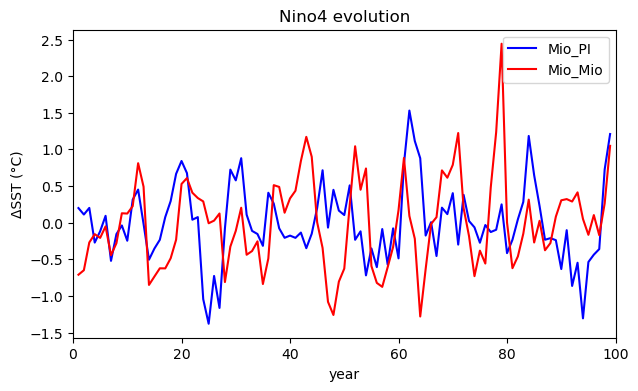

In [32]:
print('(ENSO amplitude)')
print('Mio_Pi Nino4 std: ', np.std(Nino4_Pi_djf2.values))
print('Mio_Mio Nino4 std: ', np.std(Nino4_Mio_djf2.values))
;

# Create the plot
fig, ax1 = plt.subplots()
fig.set_size_inches(7,4)

ax1.set_xlabel('year')
ax1.set_ylabel('ΔSST (°C)')
ax1.plot(np.arange(1,100,1), Nino4_Pi_djf2, color='b')
ax1.plot(np.arange(1,100,1), Nino4_Mio_djf2, color='r')

plt.title('Nino4 evolution')
plt.xlim(0, 100)
plt.legend(['Mio_PI', 'Mio_Mio'])

# Show the plot
plt.show()

---
## 4. Pick ENSO years  &  plot precipitation composite during ENSO years 
### Mio_Pi (Miocene simulation with Pre-industrial aerosols)

El Nino:  4
Neutral:  91
La Nina:  4


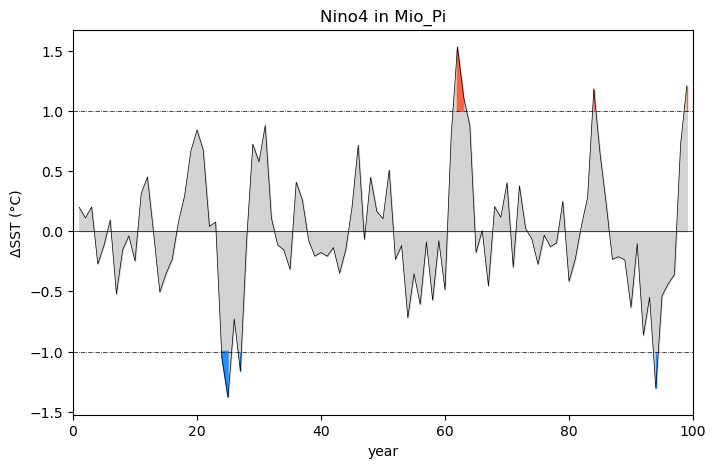

In [41]:
# --- Mio_PI: (Nino4 index) ---
elnino_Pi = Nino4_Pi_djf2.where(Nino4_Pi_djf2>=1)
lanina_Pi = Nino4_Pi_djf2.where(Nino4_Pi_djf2<=-1)
neutral_Pi = Nino4_Pi_djf2.where(np.logical_and(Nino4_Pi_djf2>-1, Nino4_Pi_djf2<1))

print('El Nino: ', elnino_Pi.count(dim='time').values)
print('Neutral: ', neutral_Pi.count(dim='time').values)
print('La Nina: ', lanina_Pi.count(dim='time').values)

counts_Pi=[elnino_Pi.count(dim='time').values,
        lanina_Pi.count(dim='time').values,
        neutral_Pi.count(dim='time').values]

# Create the plot
fig, ax2 = plt.subplots()
fig.set_size_inches(8,5)

ax2.set_xlabel('year')
ax2.set_ylabel('ΔSST (°C)')
ax2.plot(np.arange(1,100,1), Nino4_Pi_djf2, color='k', linewidth=0.5)
plt.fill_between(np.arange(1,100,1), Nino4_Pi_djf2, color='lightgrey')
plt.fill_between(np.arange(1,100,1), elnino_Pi, y2=1.0, color='tomato')
plt.fill_between(np.arange(1,100,1), lanina_Pi, y2=-1.0, color='dodgerblue')

plt.title('Nino4 in Mio_Pi')
plt.xlim(0, 100)

plt.axhline(0, color='black', linewidth=0.5)
plt.axhline(1, color='black', linewidth=0.5, linestyle='-.')
plt.axhline(-1, color='black', linewidth=0.5, linestyle='-.')

# Show the plot
plt.show()

In [42]:
# --- (var.): precipitation ---

precc_Pi = ds_Pi['PRECC']
precl_Pi = ds_Pi['PRECL']
prec_Pi = (precc_Pi + precl_Pi)*1000*86400

prec_Pi_clim = prec_Pi.groupby('time.month').mean()
prec_Pi_ano = prec_Pi.groupby('time.month')-prec_Pi_clim

# --- Mio_Pi: DJF
globe_shape1 = (100, 12, 96, 144)
prec_Pi_yr1 = np.random.randn(*globe_shape1)

for yy in range(100):
    prec_Pi_yr1[yy,:,:,:] = prec_Pi_ano[yy*12:yy*12+12,:,:]

globe_shape2 = (99, 96, 144)
prec_Pi_djf = np.random.randn(*globe_shape2)

for tt in range(99):
    prec_Pi_djf[tt,:,:] = (prec_Pi_yr1[tt,11,:,:] + prec_Pi_yr1[tt+1,0,:,:] + prec_Pi_yr1[tt+1,1,:,:])/3

prec_Pi_djf2 = xr.DataArray(data=prec_Pi_djf,
                            dims=['time','lat','lon'],
                            coords=[np.arange(1,100), prec_Pi_ano['lat'], prec_Pi_ano['lon']])

/home/pchen25/.conda/envs/clim_data/lib/python3.10/site-packages/xarray/core/indexing.py:1446: PerformanceWarning: Slicing with an out-of-order index is generating 100 times more chunks
  return self.array[key]


In [43]:
elnino_prec_Pi = prec_Pi_djf2.sel(time=elnino_Pi.dropna(dim='time')['time']).mean(dim='time')
lanina_prec_Pi = prec_Pi_djf2.sel(time=lanina_Pi.dropna(dim='time')['time']).mean(dim='time')
neutral_prec_Pi = prec_Pi_djf2.sel(time=neutral_Pi.dropna(dim='time')['time']).mean(dim='time')

comp_precip_Pi = [elnino_prec_Pi,lanina_prec_Pi,neutral_prec_Pi]

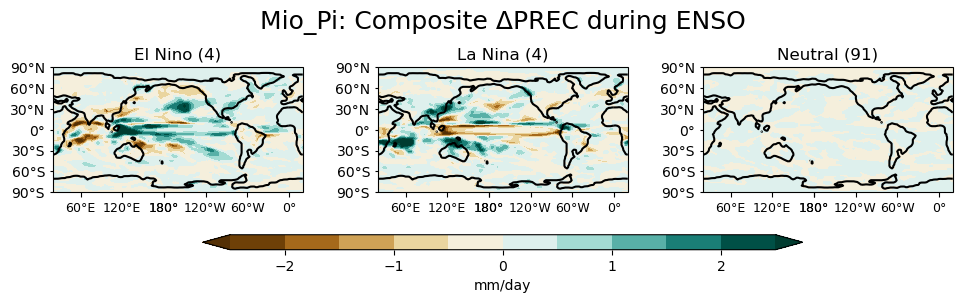

In [45]:
labels=['El Nino','La Nina', 'Neutral']
clevs = np.linspace(-2.5, 2.5, 11)

# Define the figure and each axis for the 1 rows and 3 columns
fig, axs_Pi = plt.subplots(nrows=1,ncols=3,
                        subplot_kw={'projection': ccrs.PlateCarree(central_longitude=200)},
                        figsize=(10, 15))

#flatten axs into a 1-D array (just 3 rows)
axs_Pi = axs_Pi.flatten()

#Loop over all of the composites and plot
for i,enso in enumerate(comp_precip_Pi):

        data = comp_precip_Pi[i]

        # Add the cyclic point
        data,lons = add_cyclic_point(data, coord=comp_precip_Pi[i]['lon'])

        # Contour plot
        cs=axs_Pi[i].contourf(lons,comp_precip_Pi[i]['lat'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='BrBG',extend='both')

        # Longitude labels
        axs_Pi[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs_Pi[i].xaxis.set_major_formatter(lon_formatter)
        axs_Pi[i].tick_params(axis='y', size=2)             # set xtick parameters
        for xlabel in axs_Pi[i].get_xticklabels():          # set xticks_label
            xlabel.set_fontsize(9)     

        # Latitude labels
        axs_Pi[i].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs_Pi[i].yaxis.set_major_formatter(lat_formatter)

        
        # Title each subplot with the name of the season
        axs_Pi[i].set_title(labels[i]+' ('+str(counts_Pi[i])+')')

        # Draw the coastines for each subplot
        axs_Pi[i].contour(lons, ds['lat'], mask, [0.5,1.5], transform=ccrs.PlateCarree(), 
                          colors='k', linewidths=1.5, zorder=3)
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.65, left=0.05, right=0.95, wspace=0.3, hspace=0.1)

# Add a colorbar
cax  = fig.add_axes([0.2, 0.37, 0.6, 0.01])    # set the [x0, y0, width, height] of the colorbar
CB   = plt.colorbar(cs, cax = cax, orientation='horizontal', label='mm/day')

# Add a big title at the top
plt.suptitle('Mio_Pi: Composite ΔPREC during ENSO', y=0.53, fontsize=18) ;

### Mio_Mio (Miocene simulation with Miocene aerosols)

El Nino:  6
Neutral:  90
La Nina:  3


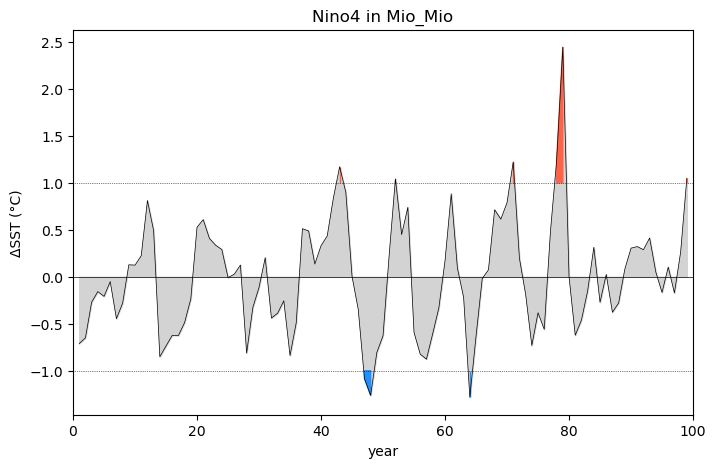

In [50]:
# --- Mio_Mio: (Nino4 index) ---

elnino_Mio = Nino4_Mio_djf2.where(Nino4_Mio_djf2>=1)
lanina_Mio = Nino4_Mio_djf2.where(Nino4_Mio_djf2<=-1)
neutral_Mio = Nino4_Mio_djf2.where(np.logical_and(Nino4_Mio_djf2>-1, Nino4_Mio_djf2<1))

print('El Nino: ', elnino_Mio.count(dim='time').values)
print('Neutral: ', neutral_Mio.count(dim='time').values)
print('La Nina: ', lanina_Mio.count(dim='time').values)

counts_Mio=[elnino_Mio.count(dim='time').values,
        lanina_Mio.count(dim='time').values,
        neutral_Mio.count(dim='time').values]

# Create the plot
fig, ax3 = plt.subplots()
fig.set_size_inches(8,5)

ax3.set_xlabel('year')
ax3.set_ylabel('ΔSST (°C)')
ax3.plot(np.arange(1,100,1), Nino4_Mio_djf2, color='k', linewidth=0.5)
plt.fill_between(np.arange(1,100,1), Nino4_Mio_djf2, color='lightgrey')
plt.fill_between(np.arange(1,100,1), elnino_Mio, y2=1.0, color='tomato')
plt.fill_between(np.arange(1,100,1), lanina_Mio, y2=-1.0, color='dodgerblue')

plt.title('Nino4 in Mio_Mio')
plt.xlim(0, 100)

plt.axhline(0, color='black', linewidth=0.5)
plt.axhline(1, color='black', linewidth=0.5, linestyle='dotted')
plt.axhline(-1, color='black', linewidth=0.5, linestyle='dotted')

# Show the plot
plt.show()

In [51]:
# --- (var.): precipitation ---

precc_Mio = ds_Mio['PRECC'][1200:2400,:,:]
precl_Mio = ds_Mio['PRECL'][1200:2400,:,:]
prec_Mio = (precc_Mio + precl_Mio)*1000*86400

prec_Mio_clim = prec_Mio.groupby('time.month').mean()
prec_Mio_ano = prec_Mio.groupby('time.month')-prec_Mio_clim

# --- Mio_Mio: DJF
globe_shape1 = (100, 12, 96, 144)
prec_Mio_yr1 = np.random.randn(*globe_shape1)

for yy in range(100):
    prec_Mio_yr1[yy,:,:,:] = prec_Mio_ano[yy*12:yy*12+12,:,:]

globe_shape2 = (99, 96, 144)
prec_Mio_djf = np.random.randn(*globe_shape2)

for tt in range(99):
    prec_Mio_djf[tt,:,:] = (prec_Mio_yr1[tt,11,:,:] + prec_Mio_yr1[tt+1,0,:,:] + prec_Mio_yr1[tt+1,1,:,:])/3

prec_Mio_djf2 = xr.DataArray(data=prec_Mio_djf,
                             dims=['time','lat','lon'],
                             coords=[np.arange(1,100), prec_Mio_ano['lat'], prec_Mio_ano['lon']])

/home/pchen25/.conda/envs/clim_data/lib/python3.10/site-packages/xarray/core/indexing.py:1446: PerformanceWarning: Slicing with an out-of-order index is generating 100 times more chunks
  return self.array[key]


In [52]:
elnino_prec_Mio = prec_Mio_djf2.sel(time=elnino_Mio.dropna(dim='time')['time']).mean(dim='time')
lanina_prec_Mio = prec_Mio_djf2.sel(time=lanina_Mio.dropna(dim='time')['time']).mean(dim='time')
neutral_prec_Mio = prec_Mio_djf2.sel(time=neutral_Mio.dropna(dim='time')['time']).mean(dim='time')

comp_precip_Mio = [elnino_prec_Mio,lanina_prec_Mio,neutral_prec_Mio]

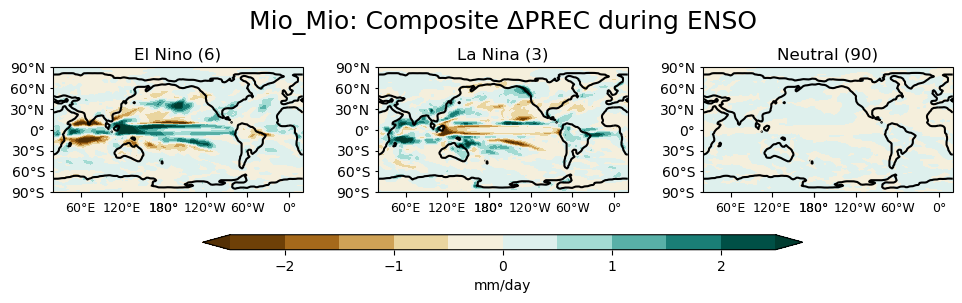

In [53]:
labels=['El Nino','La Nina', 'Neutral']
clevs = np.linspace(-2.5, 2.5, 11)

# Define the figure and each axis for the 1 rows and 3 columns
fig, axs_Mio = plt.subplots(nrows=1,ncols=3,
                        subplot_kw={'projection': ccrs.PlateCarree(central_longitude=200)},
                        figsize=(10, 15))

#flatten axs into a 1-D array (just 3 rows)
axs_Mio = axs_Mio.flatten()

#Loop over all of the composites and plot
for i,enso in enumerate(comp_precip_Mio):

        data = comp_precip_Mio[i]

        # Add the cyclic point
        data,lons = add_cyclic_point(data, coord=comp_precip_Mio[i]['lon'])

        # Contour plot
        cs=axs_Mio[i].contourf(lons,comp_precip_Mio[i]['lat'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='BrBG',extend='both')

       # Longitude labels
        axs_Mio[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs_Mio[i].xaxis.set_major_formatter(lon_formatter)
        axs_Mio[i].tick_params(axis='y', size=2)             # set xtick parameters
        for xlabel in axs_Mio[i].get_xticklabels():          # set xticks_label
            xlabel.set_fontsize(9)     

        # Latitude labels
        axs_Mio[i].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs_Mio[i].yaxis.set_major_formatter(lat_formatter)

        
        # Title each subplot with the name of the season
        axs_Mio[i].set_title(labels[i]+' ('+str(counts_Mio[i])+')')

        # Draw the coastines for each subplot
        axs_Mio[i].contour(lons, ds['lat'], mask, [0.5,1.5], transform=ccrs.PlateCarree(), 
                           colors='k', linewidths=1.5, zorder=3)
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.65, left=0.05, right=0.95, wspace=0.3, hspace=0.1)

# Add a colorbar
cax  = fig.add_axes([0.2, 0.37, 0.6, 0.01])    # set the [x0, y0, width, height] of the colorbar
CB   = plt.colorbar(cs, cax = cax, orientation='horizontal', label='mm/day')

# Add a big title at the top
plt.suptitle('Mio_Mio: Composite ΔPREC during ENSO', y=0.53, fontsize=18) ;

#### **Caveat**: the variation of ENSO could be different in different segment of time series you choose. (Burls & Fedorov 2014)